# DEMO: SAS Viya and Python Integration Fundamentals
The goal to using SAS Viya and Python is to process the big data on the distributed CAS server, then return the small summarized results to your Python client. Once the results are on your client you can use familiar Python packages.

### 1. Import Packages and Connect to CAS

In [1]:
## Import packages
import swat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Set options
pd.set_option('max_columns', None)

## Connect to CAS
conn = swat.CAS('server.demo.sas.com', 30571, 'student', 'Metadata0', name='py00d01')

In [2]:
x = conn.Fetch(to=5, index = False)


conn.setsessopt(metrics = True)

NOTE: Action 'sessionProp.setSessOpt' used (Total process time):
NOTE:       real time               0.000696 seconds
NOTE:       cpu time                0.000615 seconds (88.36%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  263.84K (0.00%)


+ Elapsed: 0.000696s, user: 0.000422s, sys: 0.000193s, mem: 0.258mb

In [6]:
x

?.table.Fetch(index=False, to=5)

In [5]:
type(x)

swat.cas.actions.table.Fetch

In [4]:
x(tbl)

NOTE: Executing action 'table.fetch'.
NOTE: Action 'table.fetch' used (Total process time):
NOTE:       real time               0.003590 seconds
NOTE:       cpu time                0.003247 seconds (90.45%)
NOTE:       total nodes             1 (16 cores)
NOTE:       total memory            125.75G
NOTE:       memory                  1.33M (0.00%)


,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [3]:
tbl = conn.CASTable('cars', caslib = 'casuser')

### 2. Explore Available Data

In [2]:
lib = 'casuser'

ci = conn.caslibInfo()
display(ci)

ti = conn.tableInfo(caslib = lib)
display(ti)

fi = conn.fileInfo(caslib = lib)
display(fi)

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,CASUSER(student),PATH,Personal File System Caslib,/home/student/casuser/,,1.0,0.0,1.0,1.0,0.0,1.0
1,Formats,PATH,Stores user defined formats.,/cas/data/caslibs/formats/,,0.0,0.0,0.0,0.0,0.0,0.0
2,ModelPerformanceData,PATH,Stores performance data output for the Model M...,/cas/data/caslibs/modelMonitorLibrary/,,0.0,0.0,0.0,0.0,0.0,0.0
3,Models,PATH,Stores models created by Visual Analytics for ...,/cas/data/caslibs/models/,,0.0,0.0,0.0,0.0,0.0,0.0
4,Public,PATH,"Shared and writeable caslib, accessible to all...",/cas/data/caslibs/public/,,0.0,0.0,0.0,0.0,0.0,0.0
5,Samples,PATH,"Stores sample data, supplied by SAS.",/cas/data/caslibs/samples/,,0.0,0.0,0.0,0.0,0.0,0.0
6,SystemData,PATH,"Stores application generated data, used for ge...",/cas/data/caslibs/sysData/,,0.0,0.0,0.0,0.0,0.0,0.0


,Name,Label,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,CARS,2004 Car Data,428,15,0,utf-8,2021-11-29T14:03:24+00:00,2021-11-29T14:03:24+00:00,2021-11-30T19:33:18+00:00,UTF8,1.953814e+09,1.953814e+09,1.953920e+09,1,0,0,0,cars.sas7bdat,CASUSER(student),0,student,,2021-11-19T20:35:37+00:00,1.952973e+09
1,LOANS_RAW,,18124151,20,0,utf-8,2021-11-30T21:00:16+00:00,2021-11-30T21:00:16+00:00,2021-11-30T21:26:42+00:00,UTF8,1.953925e+09,1.953925e+09,1.953927e+09,1,0,0,0,loans_raw.sashdat,CASUSER(student),0,student,,2021-11-19T20:31:23+00:00,1.952973e+09


,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,,,loans_raw.sashdat,5763086160,NONE,2021-11-19T20:31:23+00:00,1.952973e+09
1,-rwxr-xr-x,,,customers_raw.csv,707413672,,2021-11-19T20:34:22+00:00,1.952973e+09
2,-rwxr-xr-x,,,appRatings.sashdat,1959413984,NONE,2021-11-19T20:35:33+00:00,1.952973e+09
3,-rwxr-xr-x,,,cars.txt,35573,,2021-11-19T20:35:37+00:00,1.952973e+09
4,-rwxr-xr-x,,,cars.sas7bdat,139264,,2021-11-19T20:35:37+00:00,1.952973e+09
5,-rwxr-xr-x,,,heart.sashdat,1009056,NONE,2021-11-19T20:35:37+00:00,1.952973e+09


### 3. Load Data into Memory

In [3]:
conn.loadTable(path = 'loans_raw.sashdat', caslib = lib)

NOTE: Cloud Analytic Services made the file loans_raw.sashdat available as table LOANS_RAW in caslib CASUSER(student).


[caslib]

 'CASUSER(student)'

[tableName]

 'LOANS_RAW'

[casTable]

 CASTable('LOANS_RAW', caslib='CASUSER(student)')

+ Elapsed: 2.52s, user: 0.0554s, sys: 0.955s, mem: 5.45mb

### 4. Reference a CAS Table

In [4]:
tbl = conn.CASTable('loans_raw', caslib = lib)

### 5. Explore a CAS Table

a. 
- Find the number of rows and columns in a CAS table using the shape method. 
- Preview a CAS table using the head method. 
- View the column attributes of a CAS table using the dtypes method.
- View additional column attributes of a CAS table using the columnInfo CAS action.
- Use the describe method to obtain descriptive statistics of a CAS table.

In [ ]:
tbl.describe()
conn.close()

In [ ]:
print('test')

In [10]:
## Process the following in the CAS server and store the results on the client
shape = tbl.shape
head = tbl.head()
dtypes = tbl.dtypes
ci = tbl.columnInfo()
describe = tbl.describe()


## Display the objects returned from the CAS server
displayValues = [shape, head, dtypes, ci, describe]
for i in displayValues:
    display(i)

(18124151, 20)

,ID,AccNumber,Year,Month,Day,CurrentDate,SalaryGroup,Age,Salary,EmpLength,Category,Amount,InterestRate,LoanLength,LoanGrade,LoanStatus,LastPurchase,Cancelled,CancelledReason,Promotion
0,A-00004717474125791341,PKEO-0817-6476-0886-6861,2019.0,4.0,8.0,31DEC2022,"$250,001-$500,000",69.0,286566.0,13.0,Credit Card,0.00,11.17,999999.0,B,Current,2022-12-26,0.0,,0.0
1,A-00004717474125791341,CL29994602408260121571500004,2017.0,10.0,26.0,31DEC2022,"$250,001-$500,000",69.0,286566.0,13.0,Consolidation,0.00,6.60,10.0,B,Current,NaT,0.0,,0.0
2,E-00007310430754441768,CL6756790236104281-3236500,2022.0,9.0,8.0,31DEC2022,"$250,001-$500,000",62.0,298003.0,9.0,Car Loan,53115.58,3.89,7.0,B,Current,NaT,0.0,,0.0
3,E-00007310430754441768,M3571224738843740-94918000,2018.0,10.0,6.0,31DEC2022,"$250,001-$500,000",62.0,298003.0,9.0,Mortgage,0.00,4.56,30.0,B,Cancelled,NaT,1.0,Better Altern,0.0
4,E-00007310430754441768,PKEO-3953-3978-5572-2869,2018.0,4.0,27.0,31DEC2022,"$250,001-$500,000",62.0,298003.0,9.0,Credit Card,0.00,17.76,999999.0,B,Late,2019-02-08,0.0,,0.0


ID                 varchar
AccNumber          varchar
Year                double
Month               double
Day                 double
CurrentDate        varchar
SalaryGroup        varchar
Age                 double
Salary              double
EmpLength           double
Category           varchar
Amount              double
InterestRate        double
LoanLength          double
LoanGrade          varchar
LoanStatus         varchar
LastPurchase        double
Cancelled           double
CancelledReason    varchar
Promotion           double
dtype: object

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,ID,,1,varchar,30,30,,0,0
1,AccNumber,,2,varchar,30,30,,0,0
2,Year,,3,double,8,12,,0,0
3,Month,,4,double,8,12,,0,0
4,Day,,5,double,8,12,,0,0
5,CurrentDate,,6,varchar,9,9,,0,0
6,SalaryGroup,,7,varchar,22,22,,0,0
7,Age,,8,double,8,12,,0,0
8,Salary,,9,double,8,12,,0,0
9,EmpLength,,10,double,8,12,,0,0


,Year,Month,Day,Age,Salary,EmpLength,Amount,InterestRate,LoanLength,LastPurchase,Cancelled,Promotion
count,1.812415e+07,1.812415e+07,1.812415e+07,1.812415e+07,1.812415e+07,1.805494e+07,1.812415e+07,1.812415e+07,1.812415e+07,9.594613e+06,1.812415e+07,1.812415e+07
mean,2.018831e+03,6.500534e+00,1.399852e+01,4.242840e+01,1.706114e+05,1.155330e+01,1.722356e+04,1.233118e+01,5.293867e+05,2.280245e+04,1.002530e-02,1.801182e-02
std,2.469937e+00,3.201886e+00,7.516325e+00,1.210131e+01,2.757779e+05,4.440125e+00,1.430977e+05,5.859204e+00,4.991307e+05,4.691731e+02,9.962325e-02,1.329940e-01
min,2.013000e+03,1.000000e+00,1.000000e+00,1.800000e+01,5.000000e+03,0.000000e+00,-2.995870e+03,0.000000e+00,1.500000e+00,1.936100e+04,0.000000e+00,0.000000e+00
25%,2.017000e+03,4.000000e+00,8.000000e+00,3.300000e+01,5.347900e+04,9.000000e+00,0.000000e+00,6.640000e+00,7.000000e+00,2.292000e+04,0.000000e+00,0.000000e+00
50%,2.019000e+03,6.000000e+00,1.400000e+01,4.200000e+01,9.073800e+04,1.200000e+01,0.000000e+00,1.367000e+01,9.999990e+05,2.299900e+04,0.000000e+00,0.000000e+00
75%,2.021000e+03,9.000000e+00,2.000000e+01,5.200000e+01,1.925585e+05,1.500000e+01,5.524630e+03,1.690000e+01,9.999990e+05,2.300600e+04,0.000000e+00,0.000000e+00
max,2.022000e+03,1.200000e+01,2.700000e+01,7.000000e+01,2.499997e+06,3.400000e+01,1.061860e+07,3.441000e+01,9.999990e+05,2.300900e+04,1.000000e+00,1.000000e+00


e. Find the number of distinct and missing values of each column in a CAS table. Use the maxNVals parameter to limit the distinct values to *10,000*. Store the results in a **DataFrame**.

In [9]:
## Process the data in CAS and return a DataFrame
maxNumberDistinct = 10000
df = tbl.distinct(maxNVals = 10000)['Distinct'].query(f'NDistinct != {maxNumberDistinct}')

display(df)

,Column,NDistinct,NMiss,Trunc
2,Year,10.0,0.0,0.0
3,Month,12.0,0.0,0.0
4,Day,27.0,0.0,0.0
5,CurrentDate,1.0,0.0,0.0
6,SalaryGroup,5.0,0.0,0.0
7,Age,53.0,0.0,0.0
9,EmpLength,36.0,69212.0,0.0
10,Category,13.0,0.0,0.0
12,InterestRate,3237.0,0.0,0.0
13,LoanLength,10.0,0.0,0.0


g. Return a **Series** from a CAS table containing counts of unique values of the **Category** column. Plot the series using Pandas.

Credit Card         0.529383
Consolidation       0.085163
Mortgage            0.076207
Small Business      0.069785
Car Loan            0.069774
Home Improvement    0.059884
Education           0.039903
Medical             0.029962
Personal            0.010021
Major Purchase      0.009987
Vacation            0.009952
Weddings            0.004997
Moving Expenses     0.004983
dtype: float64

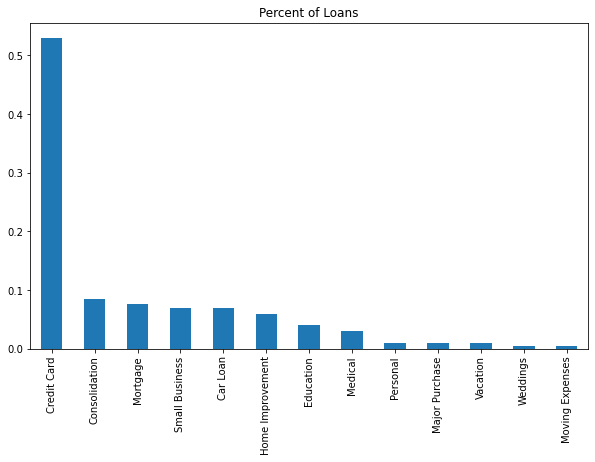

In [11]:
## Process the data in CAS and return a DataFrame
df = tbl.Category.value_counts(normalize=True)
display(df)

## Plot on the client
df.plot(kind = 'bar', figsize=(10,6), title = 'Percent of Loans');

### 6. Prepare a CAS Table
Create a new CAS table with only *Credit Card* data.

a. Add parameters to the CASTable object to filter rows for *Credit Card*, create a new computed column named **AccOpenDate** using the SAS function mdy, then select the specific columns.

In [12]:
tbl.where = 'Category = "Credit Card"'
tbl.computedVars = [dict(name = 'AccOpenDate', format = 'mmddyy10.')]
tbl.computedVarsProgram = 'AccOpenDate = mdy(Month, Day, Year)'

tbl.vars = ['ID', 'AccNumber', 'LoanGrade', 'AccOpenDate', 'Salary', 'Category', 'Amount', 'InterestRate', 'Cancelled', 'CancelledReason', 'LastPurchase', 'Promotion']

tbl

CASTable('loans_raw', caslib='casuser', computedvars=[dict(format='mmddyy10.', name='AccOpenDate')], computedvarsprogram='AccOpenDate = mdy(Month, Day, Year)', vars=['ID', 'AccNumber', 'LoanGrade', 'AccOpenDate', 'Salary', 'Category', 'Amount', 'InterestRate', 'Cancelled', 'CancelledReason', 'LastPurchase', 'Promotion'], where='Category = "Credit Card"')

b. Preview the new CAS table using the head method.

In [13]:
## Process the data in CAS and return a DataFrame
tbl.head()

,ID,AccNumber,LoanGrade,AccOpenDate,Salary,Category,Amount,InterestRate,Cancelled,CancelledReason,LastPurchase,Promotion
0,A-00004717474125791341,PKEO-0817-6476-0886-6861,B,2019-04-08,286566.0,Credit Card,0.00,11.17,0.0,,2022-12-26,0.0
1,E-00007310430754441768,PKEO-3953-3978-5572-2869,B,2018-04-27,298003.0,Credit Card,0.00,17.76,0.0,,2019-02-08,0.0
2,E-00007310430754441768,PKEO-4139-3514-8736-0782,B,2019-11-21,298003.0,Credit Card,0.00,15.68,0.0,,2022-12-20,0.0
3,F-00008049552142620087,PKEO-5244-4516-2715-4135,C,2020-03-27,181615.0,Credit Card,0.00,19.05,0.0,,2021-08-01,0.0
4,F-00008049552142620087,PKEO-4058-8494-7250-1864,C,2021-05-08,181615.0,Credit Card,2990.02,16.82,0.0,,2022-12-23,0.0


c. View the number of rows and columns in the new CAS table reference.

In [15]:
tbl.numRows()

[numrows]

 9594613

+ Elapsed: 1.95s, user: 21.1s, sys: 0.198s, mem: 140mb

d. Create a new CAS table using the copyTable action. 

In [16]:
## New output table information
newTbl = dict(name = 'CreditCards', caslib = lib, replace = True)

## Create a new CAS table
tbl.copyTable(casOut = newTbl)

[caslib]

 'CASUSER(student)'

[tableName]

 'CREDITCARDS'

[casTable]

 CASTable('CREDITCARDS', caslib='CASUSER(student)')

+ Elapsed: 11.2s, user: 35.4s, sys: 19.1s, mem: 253mb

e. View the available in-memory tables. Notice the new CAS table **creditcards**.

In [17]:
conn.tableInfo(caslib = lib)

,Name,Label,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,LOANS_RAW,,18124151,20,0,utf-8,2021-11-30T18:16:05+00:00,2021-11-30T18:16:05+00:00,2021-11-30T18:21:26+00:00,UTF8,1.953915e+09,1.953915e+09,1.953916e+09,0,0,0,0,loans_raw.sashdat,CASUSER(student),0,student,,2021-11-19T20:31:23+00:00,1.952973e+09
1,CREDITCARDS,,9594613,12,0,utf-8,2021-11-30T18:21:28+00:00,2021-11-30T18:21:28+00:00,2021-11-30T18:21:28+00:00,UTF8,1.953916e+09,1.953916e+09,1.953916e+09,0,0,0,0,,,0,student,,,NaN
2,CARS,2004 Car Data,428,15,0,utf-8,2021-11-29T14:03:24+00:00,2021-11-29T14:03:24+00:00,2021-11-30T16:26:32+00:00,UTF8,1.953814e+09,1.953814e+09,1.953909e+09,1,0,0,0,cars.sas7bdat,CASUSER(student),0,student,,2021-11-19T20:35:37+00:00,1.952973e+09


### 7. Analyze a CAS Table

a. Reference the **creditcards** CAS table in the variable **ccTbl** and preview the table using the fetch action. Within the fetch action, sort the results.

**DATA FIX: Modify fake data negative values**


In [18]:
ccTbl = conn.CASTable('creditcards', caslib = lib)

## Process the data in CAS and return a DataFrame with a preview of the data
ccTbl.sort_values('Amount', ascending = False).head()

,ID,AccNumber,LoanGrade,AccOpenDate,Salary,Category,Amount,InterestRate,Cancelled,CancelledReason,LastPurchase,Promotion
0,D-00002898487197235227,PKEO-1300-8931-8985-6742,A,2021-10-15,192882.0,Credit Card,50851.30,12.10,0.0,,2022-12-26,0.0
1,G-00009356851624324918,PKEO-1599-6310-0920-8327,A,2022-03-08,223750.0,Credit Card,48334.54,14.03,0.0,,2022-12-27,0.0
2,J-00003607088944409044,PKEO-9889-9663-1584-8590,C,2021-02-11,134938.0,Credit Card,45629.56,16.81,0.0,,2022-12-14,0.0
3,C-00002578859021887183,PKEO-1388-2361-7022-2397,A,2022-06-20,192788.0,Credit Card,44738.20,13.45,0.0,,2022-12-29,0.0
4,E-00007658244187477976,PKEO-7466-5962-3742-0041,C,2022-10-22,158476.0,Credit Card,44400.67,20.53,0.0,,2022-12-20,0.0


b. Find the number credit card accounts opened by year.

In [19]:
## Process the data in CAS and return a Series to the client
ccTbl.computedVarsProgram = 'YearOpen = round(year(AccOpenDate));'
df = ccTbl.YearOpen.value_counts().sort_index(ascending = False)
df

2022.0    1729043
2021.0    1342602
2020.0    1056244
2019.0    1438261
2018.0    1245375
2017.0     960814
2016.0     671806
2015.0     575238
2014.0     383713
2013.0     191517
dtype: int64

c. Plot the series using the Pandas plotting method.

<AxesSubplot:title={'center':'Opened Credit Card Accounts by Year'}>

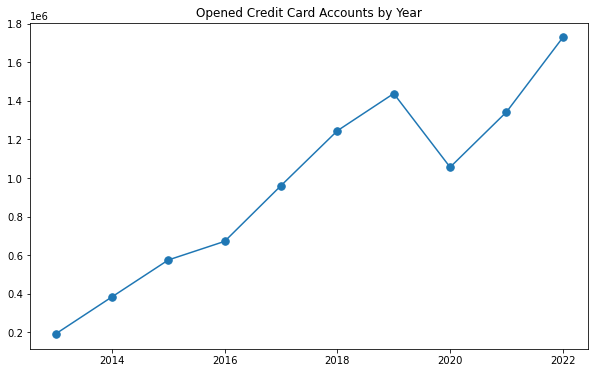

In [20]:
## Plot on results on the client
df.plot(kind = 'line', figsize = (10,6), style = '.-', markersize=15,
        title = "Opened Credit Card Accounts by Year")

d. Identify the total number of credit cards by **LoanGrade**.

In [ ]:
## Process the data in CAS and return a DataFrame
df = ccTbl.LoanGrade.value_counts()
display(df)

## Plot the results on the client
sns.barplot(x=df.index, y = df.values);

e. Find the min, mean, max and total sum of credit card loans by **LoanGrade**.

In [ ]:
## Process the data in CAS and return a DataFrame with a preview of the data
ccTbl.groupBy = 'LoanGrade'
ccTbl.vars = 'Amount'

df = ccTbl.summary(subSet = ['MIN','MEAN','MAX', 'SUM']).concat_bygroups()['Summary']
display(df)

ccTbl.del_params('groupby', 'vars')

f. Plot the mean **Amount** of each **LoanGrade** using the **DataFrame** and Pandas plotting method.

In [ ]:
## Plot the results on the client
df.plot(kind = 'bar', y = 'Mean', figsize = (10,5));

### 8. Terminate Connection to CAS

In [21]:
conn.terminate()